In [149]:
import sys
sys.path.append("../../src")
import models, constants
from maneuvers import Maneuvers
import matplotlib.pyplot as plt
import datetime
import numpy as np
%load_ext autoreload
%autoreload 2

coe = [constants.Re+500e3,0.0001,1,1,1,1]
startDate = datetime.datetime.now()
spacecraft             = models.Spacecraft(3,2.5,10e-2*10e-2)
spacecraft.thruster    = models.NanoPropCGP3()
spacecraft.battery     = models.NanoPowerBP4("2P-2S")
spacecraft.solarPanels = models.DHV_CS_10(3)
spacecraft.thruster.power = 4
#spacecraft.thruster.thrust = 50e-3
#spacecraft.thruster.isp = 1000
maneuvers = Maneuvers(coe,spacecraft,startDate)
maneuvers._INCLUDE_ENERGY_CALCULATION_ = True
maneuvers.propagate(60*60*12,60)
maneuvers.addPerturbation("thrust")
maneuvers.propagate(60*60*24,1)
maneuvers.removePerturbation("thrust")
maneuvers.propagate(60*60*12,60)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Propagating...from day  0.0  to  0.5
Propagating...from day  0.5  to  1.5
Propagating...from day  1.5  to  2.0


------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Date/Time:
  Initial Date: 2018-12-07 11:28:29

Spacecraft:
  Wet Mass: 		3 kg
  Dry Mass: 		2.5 kg
  Propellant Mass: 	0.5 kg
  Drag Area: 		0.010000000000000002 m2
  Cd: 			2.2
  Cr: 			2

Thruster:
  Name/Model:		NanoProp CGP3
  Thrust (nominal):	0.001 N
  Isp (nominal):	100 s
  Power (nominal):	4 W

Solar Panels:
  Name/Model:			DHV CS 10
  Number of Panels:		3
  Individual Area:		0.008085 m2
  Total Power (nominal):	7.23 W

Battery:
  Name/Model:		NanoPower BP4
  Cells Configuration:	2P-2S
  Voltage:		7.4 V
  Capacity:		5200 mAh
  Energy:		38.48 Wh
  Charge Power:		14.8 W
  Discharge Power:	14.8 W

Orbit:
  Semi-major axis (a): 		6878.0 km
  Eccentricity (e): 		0.0001
  Inclination (i): 		57.29577951308232 deg
  Argument of Perigee (omega): 	57.29578 deg
  RAAN (Omega): 		57.29578 deg
  True Anomaly (nu): 		57.29578 deg

----STAGE 1----
Date/Time:
  Elapsed Time:	12:00:01.000012
  Date at end of stage:	2018-12-07 

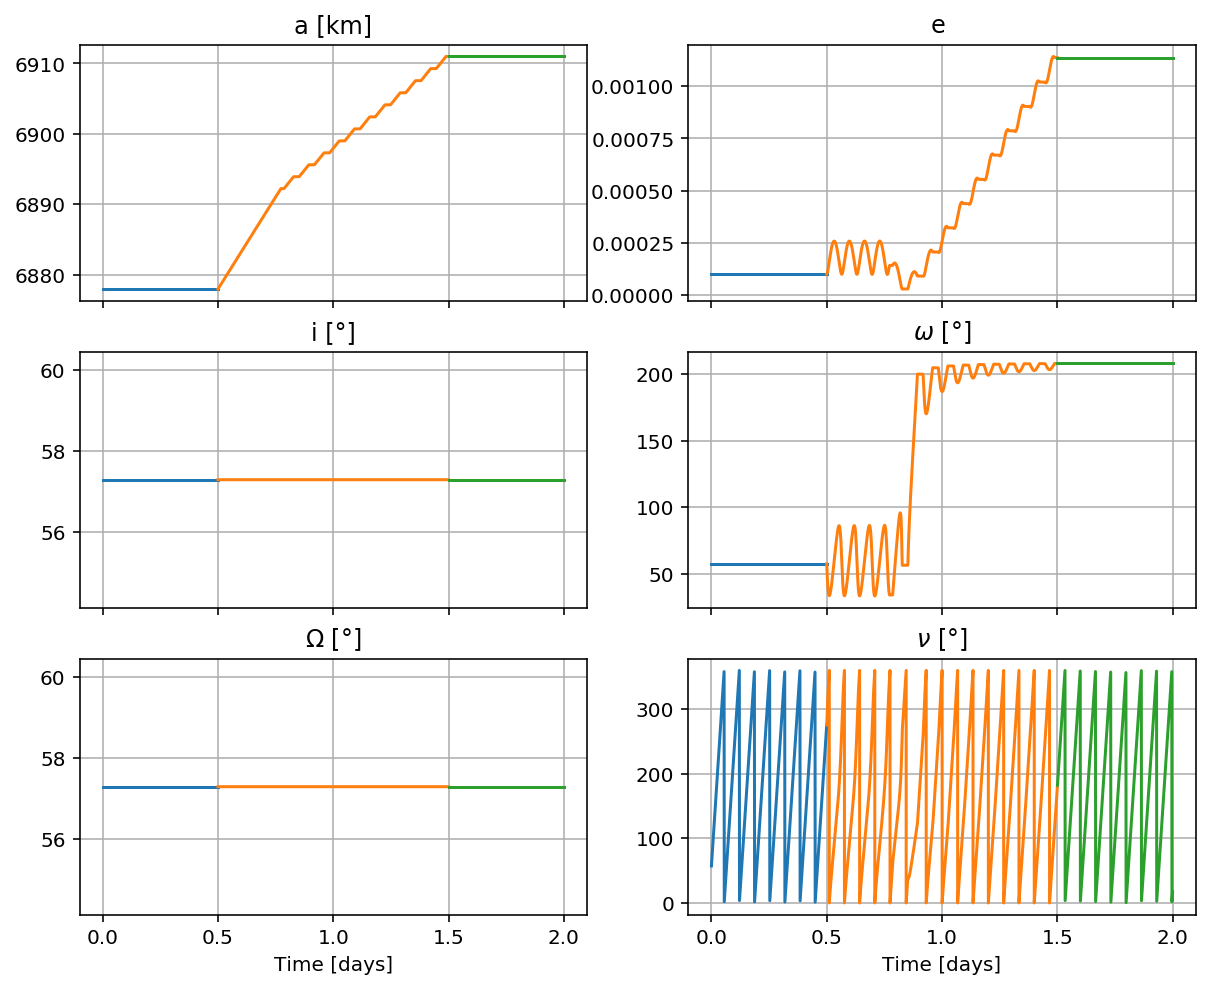

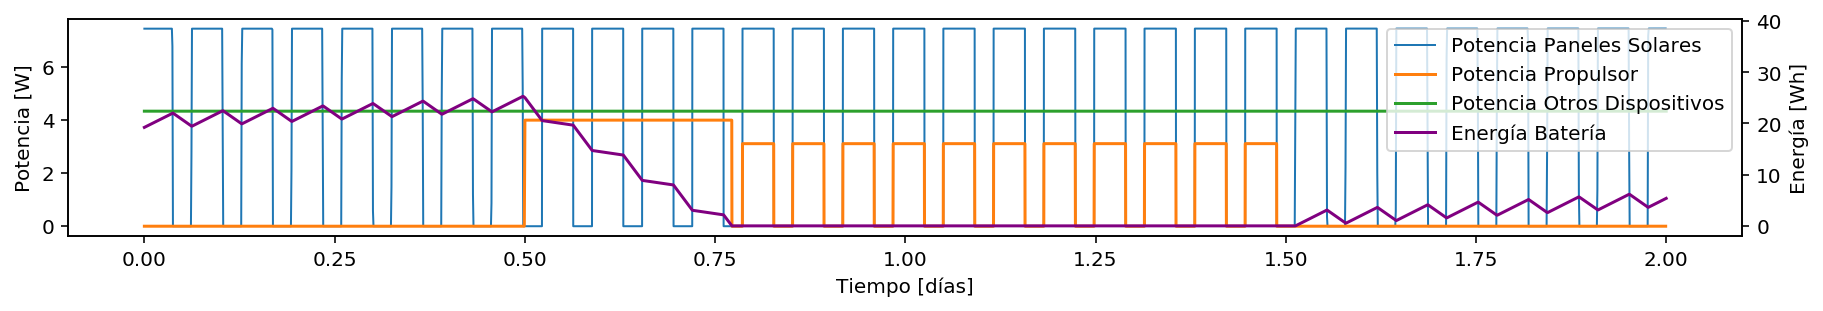

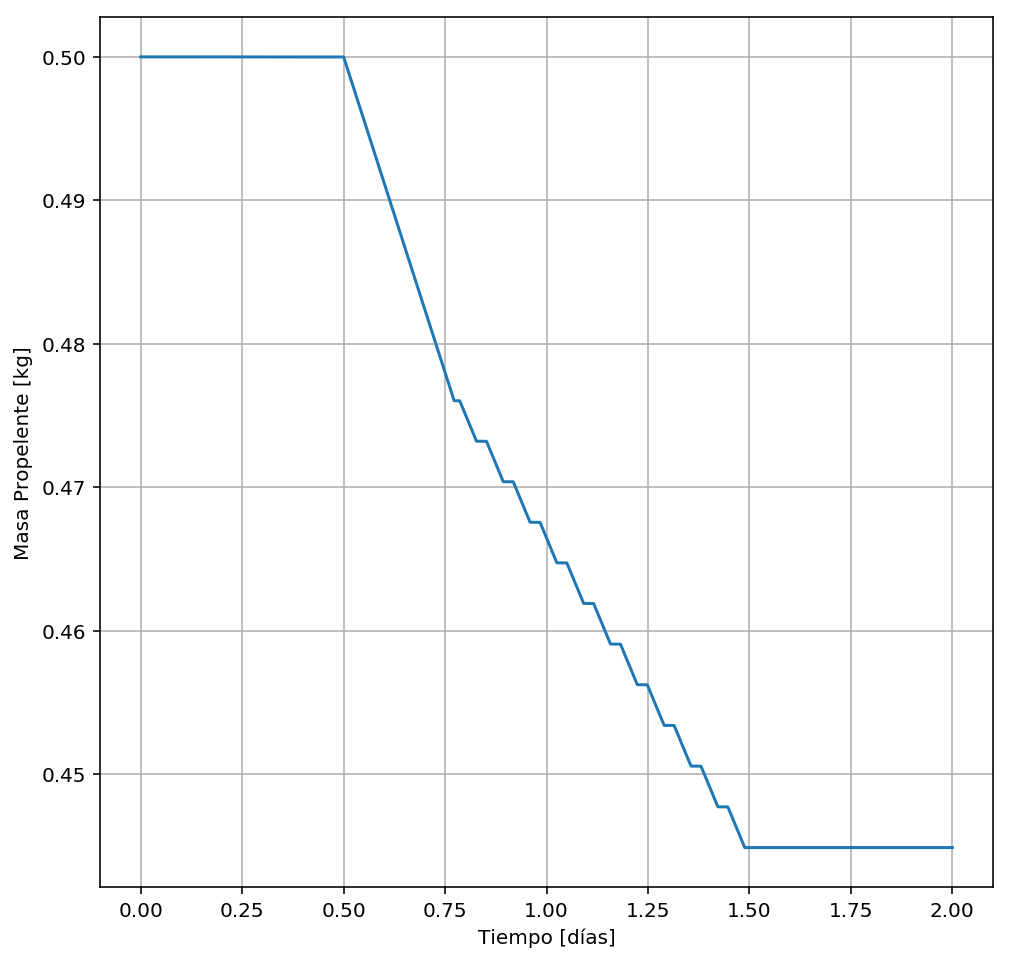

In [159]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
maneuvers.makeReport()
maneuvers.plot("coe")
fig, ax1 = plt.subplots(figsize=(15,2))
PSolarPanels = np.diff(maneuvers.history.energy["solar panels"])/np.diff(maneuvers.history.t)
PThruster = np.diff(maneuvers.history.energy["thruster"])/np.diff(maneuvers.history.t)
PBatteryDischarge = np.ones((len(maneuvers.history.t)))*maneuvers.spacecraft.battery.dischargePower
POtherDevices = np.ones((len(maneuvers.history.t)))*(maneuvers.spacecraft.solarPanels.nominalPower)*0.6

ax1.plot(maneuvers.history.t[:-1]/60/60/24, PSolarPanels,label="Potencia Paneles Solares",linewidth=1)
ax1.plot(maneuvers.history.t[:-1]/60/60/24, PThruster,label="Potencia Propulsor")
#ax1.plot(maneuvers.history.t/60/60/24, PBatteryDischarge,label="Battery Discharge Capacity")
ax1.plot(maneuvers.history.t/60/60/24,POtherDevices,label="Potencia Otros Dispositivos")
#ax1.plot(maneuvers.history.t[:-1]/60/60/24,PSolarPanels-PThruster-POtherDevices[:-1],label="Balance Potencia Batería",linestyle="--",linewidth=1)
ax1.set_ylabel("Potencia [W]")
ax1.set_xlabel("Tiempo [días]")
#ax1.grid()
#ax1.set_xlim([4,5])

ax2 = ax1.twinx()
ax2.plot(maneuvers.history.t/60/60/24, maneuvers.history.energy["battery"]/60/60,label="Energía Batería",color="purple",zorder=2)
ax2.set_ylabel("Energía [Wh]")
#ax2.set_ylim([-1,maneuvers.spacecraft.battery.energy+1])
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2,l1+l2)
ax2.set_ylim([-2,maneuvers.spacecraft.battery.energy+2])
plt.figure(figsize=(8,8))
plt.plot(maneuvers.history.t/60/60/24,maneuvers.history.propMass)
plt.xlabel("Tiempo [días]")
plt.ylabel("Masa Propelente [kg]")
plt.grid()